In [1]:
import os
import sys
from numpy import *
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pyPLUTO.pload as pp
import pyPLUTO.Image as img
from contextlib import contextmanager
import io

### Lorentz Factor Calculator

v = 100           # input in km/s
c = 299792.458 #km/s
gamma = sqrt(1 / (1 - ((v**2)/(c**2))))
print('Lorentz Factor = ',gamma)

### Plotting from dbl files

In [2]:
# Context manager to suppress stdout and stderr
@contextmanager
def suppress_output():
    original_stdout = sys.stdout
    original_stderr = sys.stderr
    sys.stdout = io.StringIO()
    sys.stderr = io.StringIO()
    try:
        yield
    finally:
        sys.stdout = original_stdout
        sys.stderr = original_stderr

# Setting the path to find the relevant files
plutodir = os.environ['PLUTO_DIR']
wdir = plutodir + '/Test_Problems/MHD/Jet/'
sub_dir = os.path.join(wdir, 'instances', 'bfv_pot_sigmas11')

# Extract the last directory name from sub_dir
dir_name = os.path.basename(os.path.normpath(sub_dir))

# Ensure the directory exists
if not os.path.exists(sub_dir):
    os.makedirs(sub_dir)

## Composite

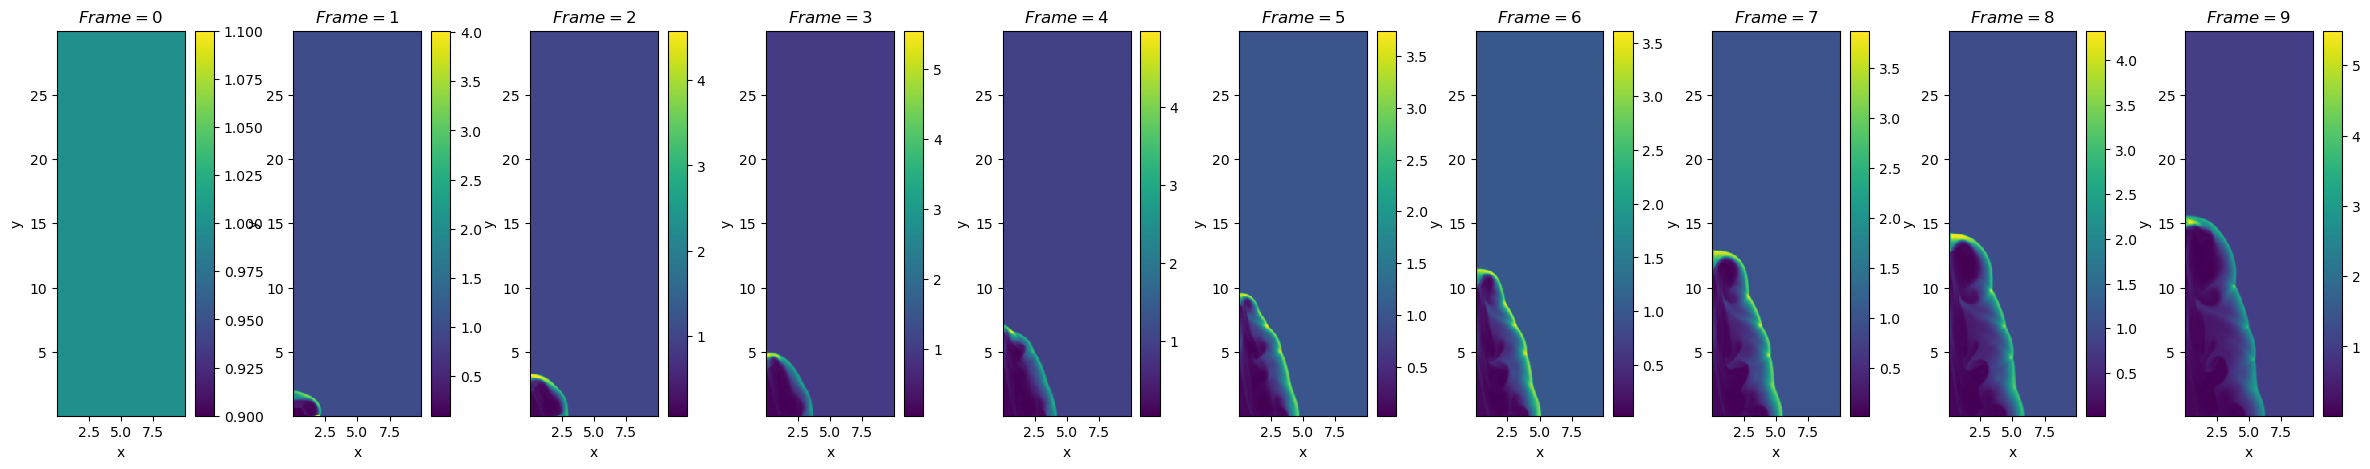

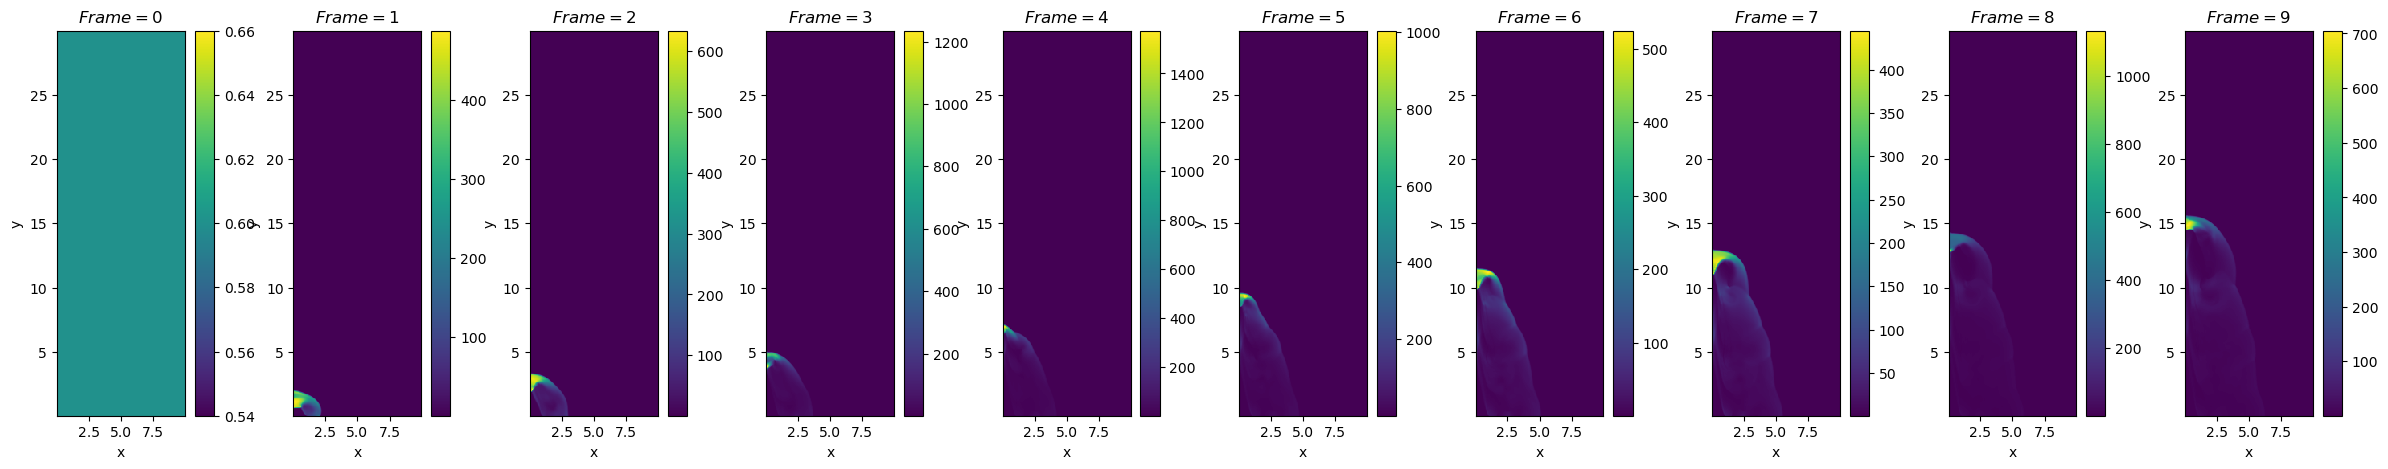

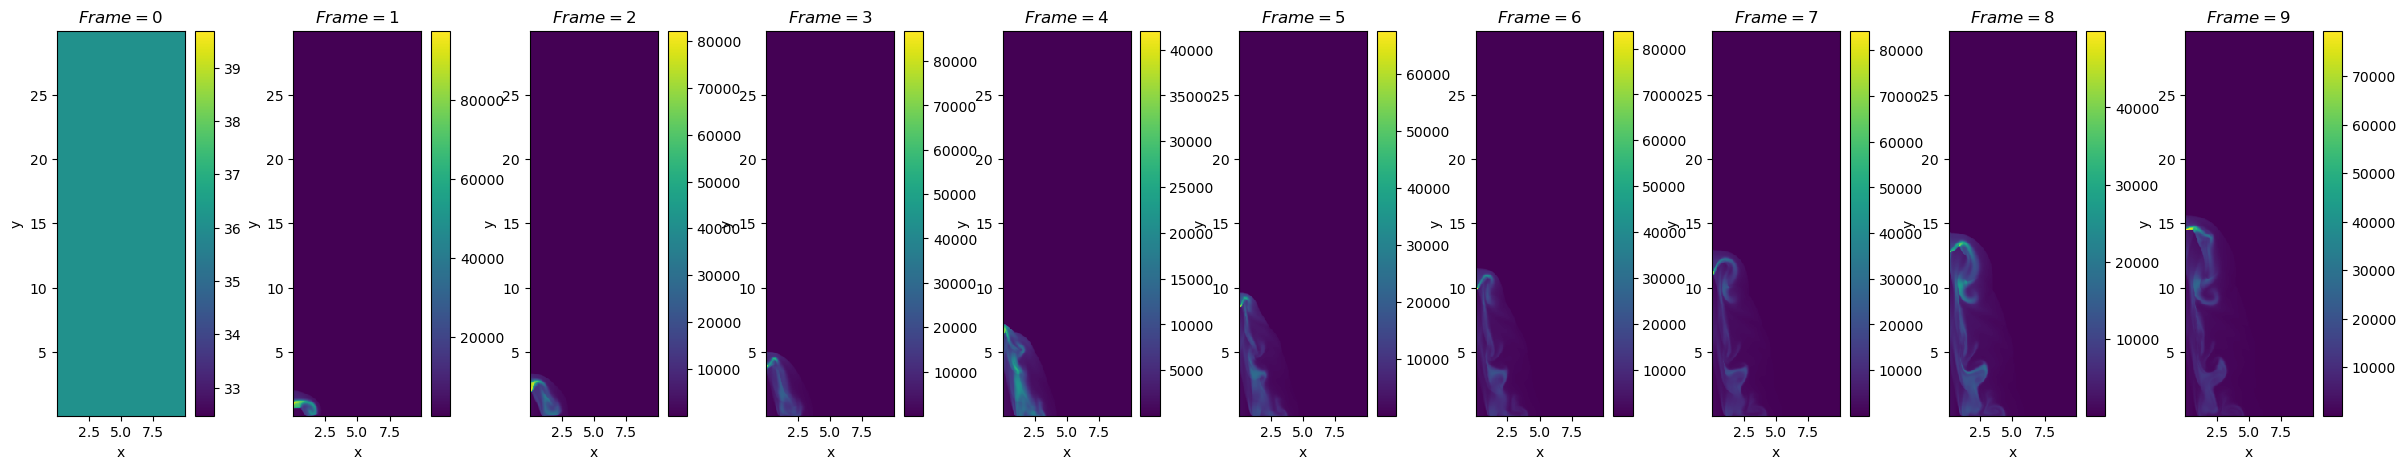

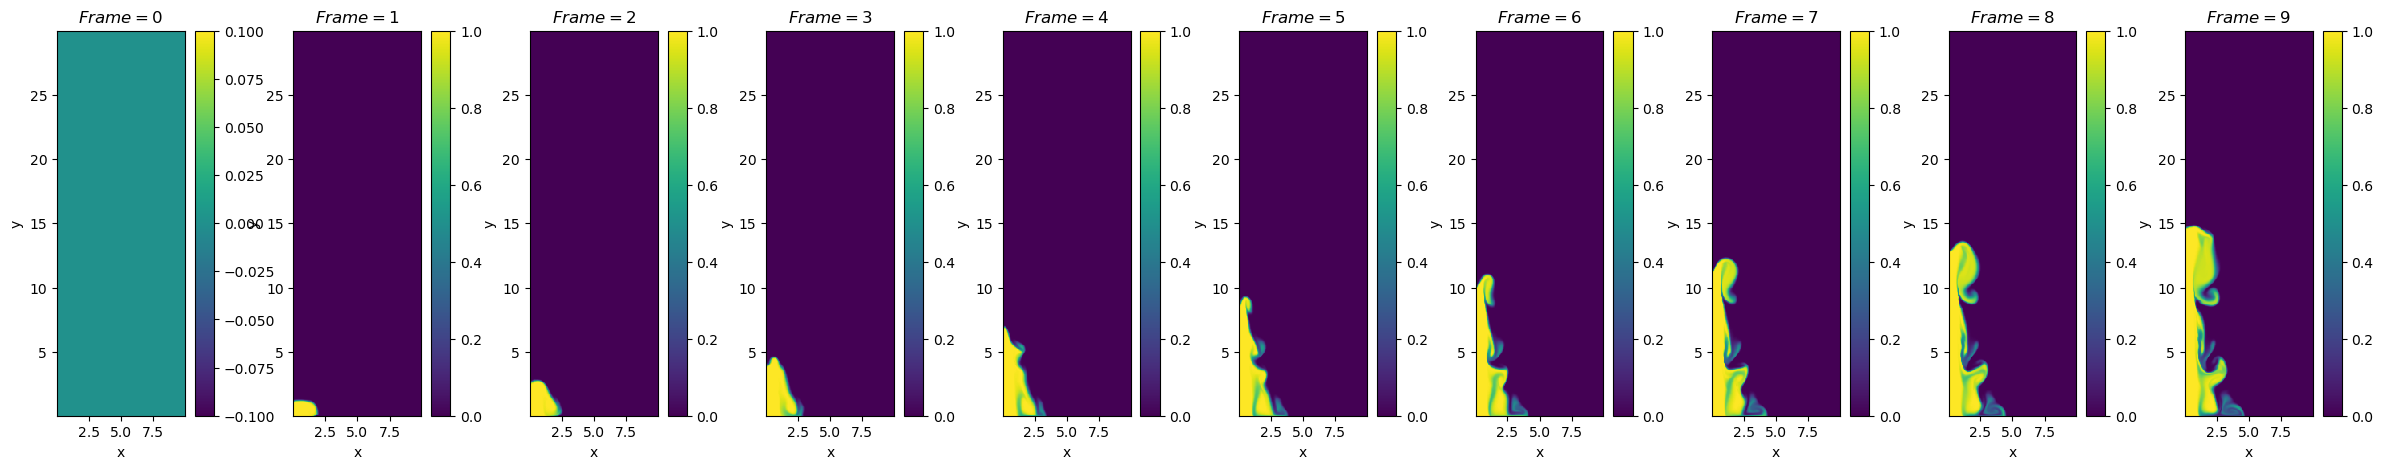

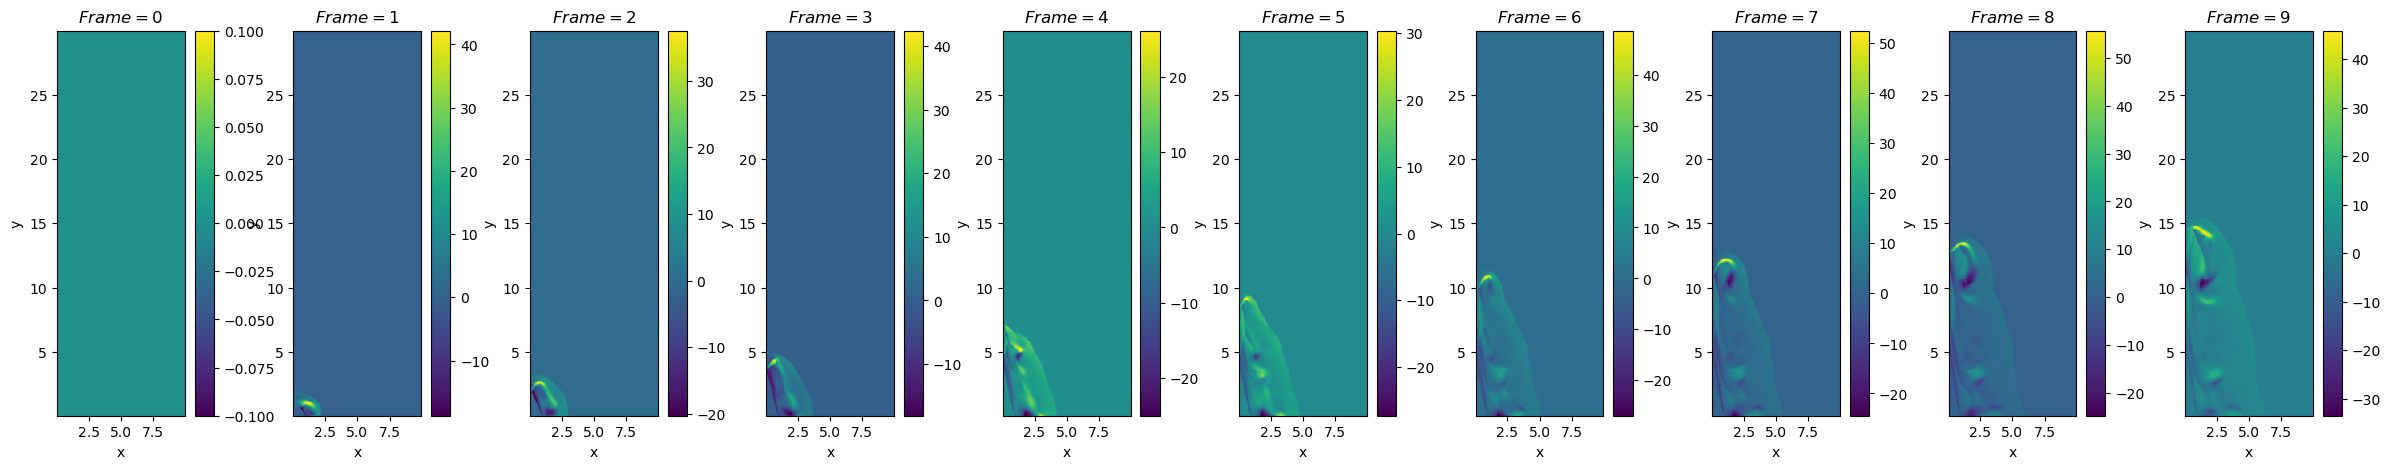

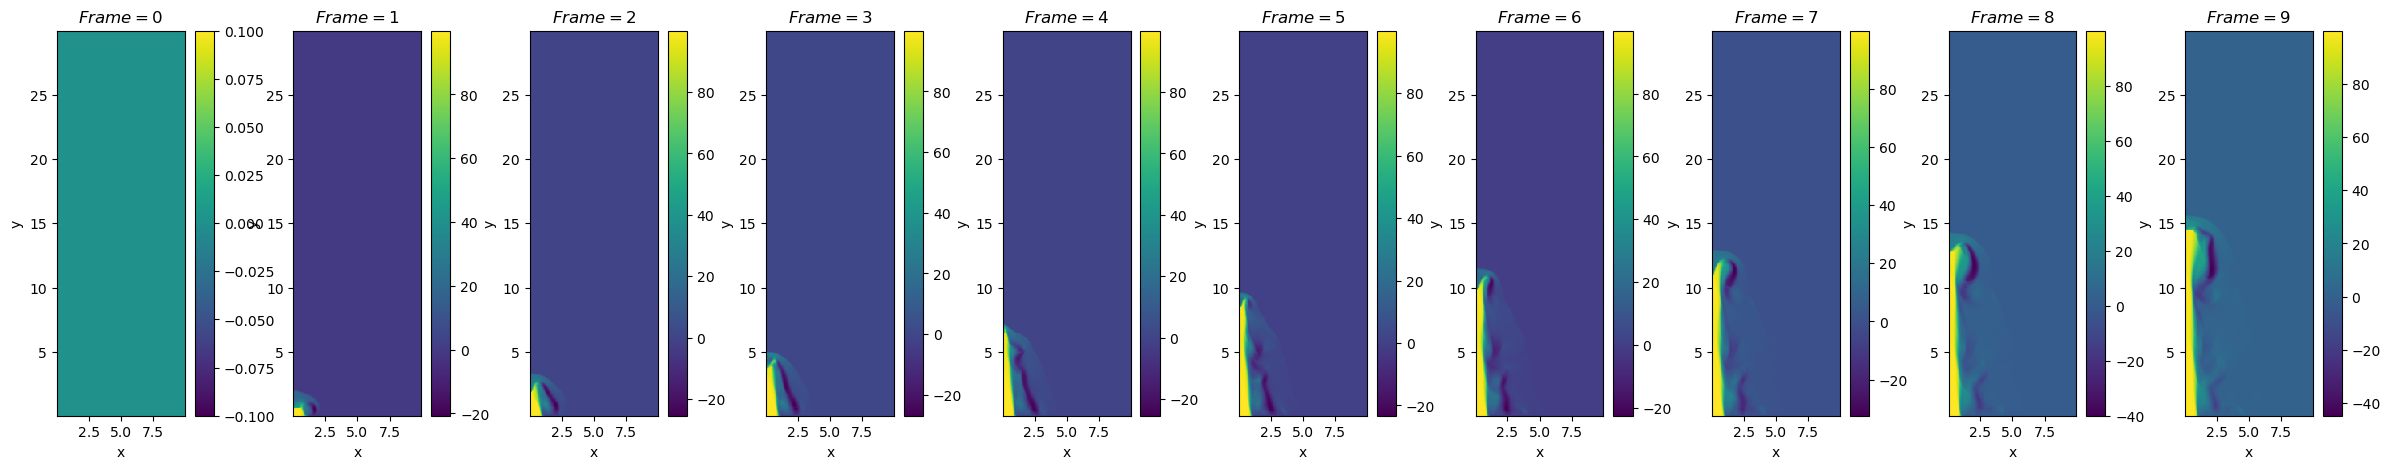

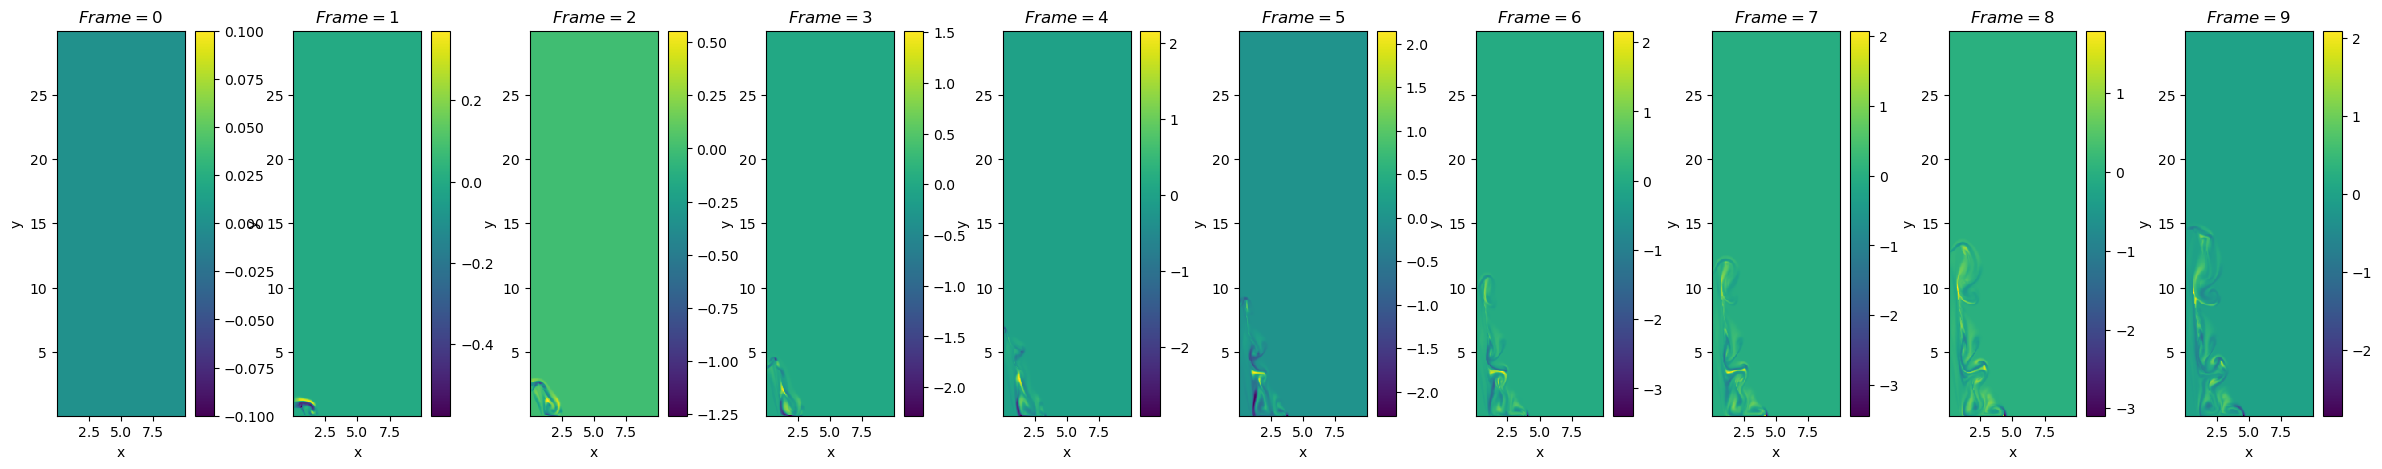

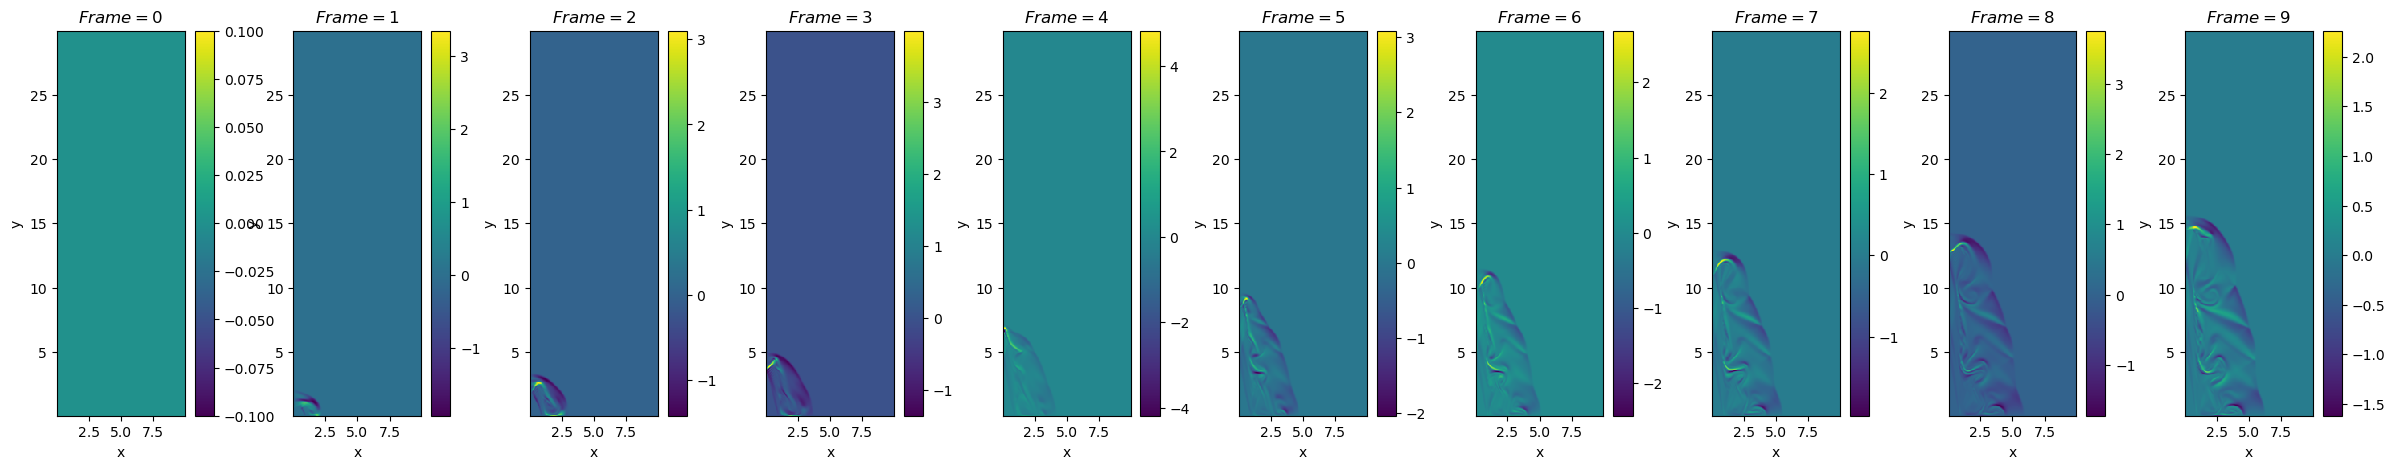

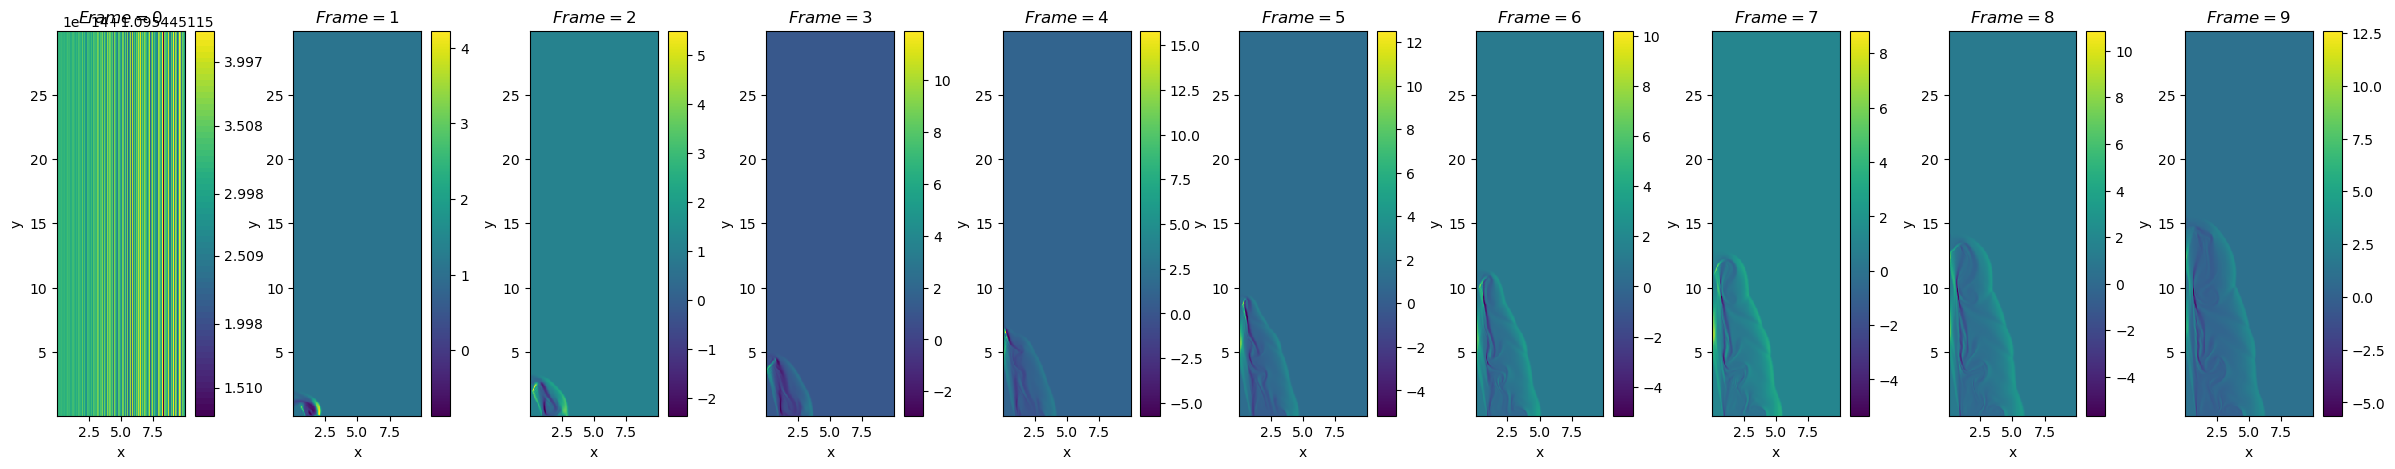

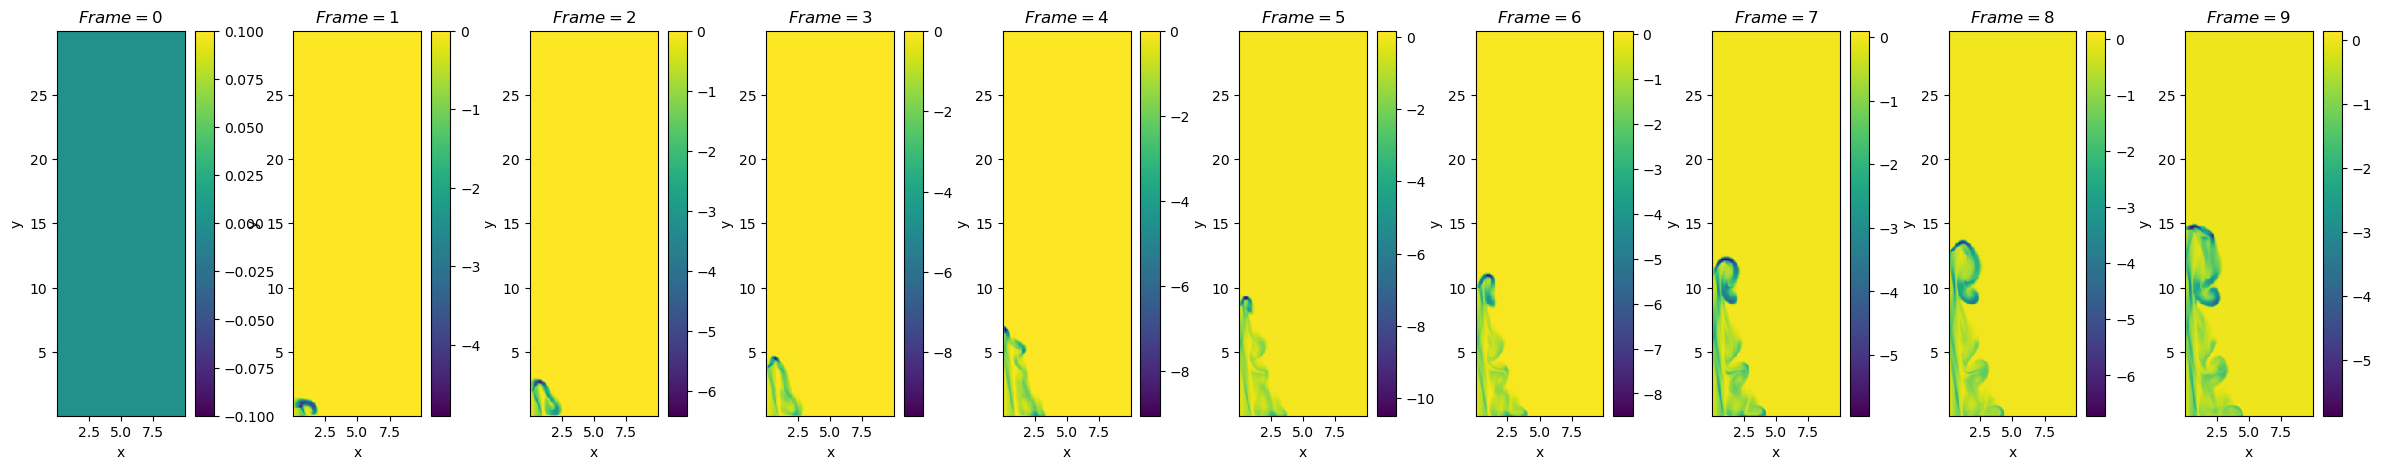

In [3]:
figs_dir = os.path.join(sub_dir, 'composite')

# Ensure the directory exists
if not os.path.exists(figs_dir):
    os.makedirs(figs_dir)

# Define a function to plot and save images
def plot_and_save(data_list, var_name, cmap='gist_rainbow'):
    I = img.Image()
    I.multi_disp(
        *[getattr(data, var_name) for data in data_list],  # Unpack all var_name values from data_list
        x1=data_list[0].x1, x2=data_list[0].x2,
        Ncols=10,
        label1=10 * ['x'],
        label2=10 * ['y'],
        title=[f'$Frame={i}$' for i in range(10)],
        cbar=(True, 'vertical', 'each'),
        figsize=[30, 5]
    )

    # Construct the filename with the directory name
    filename = f'Jet_{dir_name}_{var_name}.png'
    file_path = os.path.join(figs_dir, filename)

    # Save the figure in the specified directory
    savefig(file_path)
    show() 

# Loading the data for each variable while suppressing output
with suppress_output():
    D_rho = [pp.pload(i, w_dir=wdir, datatype='rho') for i in range(10)]
    D_prs = [pp.pload(i, w_dir=wdir, datatype='prs') for i in range(10)]
    D_tmp = [pp.pload(i, w_dir=wdir, datatype='tmp') for i in range(10)]
    D_tr1 = [pp.pload(i, w_dir=wdir, datatype='tr1') for i in range(10)]
    D_vx1 = [pp.pload(i, w_dir=wdir, datatype='vx1') for i in range(10)]
    D_vx2 = [pp.pload(i, w_dir=wdir, datatype='vx2') for i in range(10)]
    D_vx3 = [pp.pload(i, w_dir=wdir, datatype='vx3') for i in range(10)]
    D_bx1 = [pp.pload(i, w_dir=wdir, datatype='Bx1') for i in range(10)]
    D_bx2 = [pp.pload(i, w_dir=wdir, datatype='Bx2') for i in range(10)]
    D_bx3 = [pp.pload(i, w_dir=wdir, datatype='Bx3') for i in range(10)]

# Plot and save images for each variable
plot_and_save(D_rho, 'rho', cmap ='inferno')  
plot_and_save(D_prs, 'prs', cmap = 'plasma')
plot_and_save(D_rho, 'tmp', cmap = 'magma')  
plot_and_save(D_prs, 'tr1', cmap = 'viridis')
plot_and_save(D_vx1, 'vx1', cmap = 'gist_rainbow')
plot_and_save(D_vx2, 'vx2', cmap = 'gist_rainbow')
plot_and_save(D_vx3, 'vx3', cmap = 'gist_rainbow')
plot_and_save(D_bx1, 'Bx1', cmap = 'gnuplot')
plot_and_save(D_bx2, 'Bx2', cmap = 'gnuplot')
plot_and_save(D_bx3, 'Bx3', cmap = 'gnuplot')

## Frame by Frame

In [4]:
figs_dir = os.path.join(sub_dir, 'frame_by_frame')

# Ensure the directory exists
if not os.path.exists(figs_dir):
    os.makedirs(figs_dir)

# Define a function to plot and save images with specified colormap
def plot_and_save(data_list, var_name, cmap='viridis'):
    num_frames = len(data_list)
    
    # Create a plot for each frame
    for i, data in enumerate(data_list):
        plt.figure(figsize=(12, 6))
        plt.imshow(getattr(data, var_name), cmap=cmap, origin='lower')
        plt.colorbar(label=var_name)
        plt.title(f'{var_name.capitalize()} - Frame {i}')
        plt.xlabel('x')
        plt.ylabel('y')
        
        # Save the figure in the specified directory
        filename = f'Jet_{dir_name}_{var_name}_frame_{i}.png'
        file_path = os.path.join(figs_dir, filename)
        plt.savefig(file_path)
        plt.close()  # Close the figure to avoid display conflicts

# Loading the data for each variable while suppressing output
with suppress_output():
    D_rho = [pp.pload(i, w_dir=wdir, datatype='rho') for i in range(10)]
    D_prs = [pp.pload(i, w_dir=wdir, datatype='prs') for i in range(10)]
    D_tmp = [pp.pload(i, w_dir=wdir, datatype='tmp') for i in range(10)]
    D_tr1 = [pp.pload(i, w_dir=wdir, datatype='tr1') for i in range(10)]
    D_vx1 = [pp.pload(i, w_dir=wdir, datatype='vx1') for i in range(10)]
    D_vx2 = [pp.pload(i, w_dir=wdir, datatype='vx2') for i in range(10)]
    D_vx3 = [pp.pload(i, w_dir=wdir, datatype='vx3') for i in range(10)]
    D_bx1 = [pp.pload(i, w_dir=wdir, datatype='Bx1') for i in range(10)]
    D_bx2 = [pp.pload(i, w_dir=wdir, datatype='Bx2') for i in range(10)]
    D_bx3 = [pp.pload(i, w_dir=wdir, datatype='Bx3') for i in range(10)]

# Plot and save images for each variable with different colormaps
plot_and_save(D_rho, 'rho', cmap='inferno')
plot_and_save(D_prs, 'prs', cmap='plasma')
plot_and_save(D_tmp, 'tmp', cmap='magma')
plot_and_save(D_tr1, 'tr1', cmap='viridis')
plot_and_save(D_vx1, 'vx1', cmap='gist_rainbow')
plot_and_save(D_vx2, 'vx2', cmap='gist_rainbow')
plot_and_save(D_vx3, 'vx3', cmap='gist_rainbow')
plot_and_save(D_bx1, 'Bx1', cmap='gnuplot')
plot_and_save(D_bx2, 'Bx2', cmap='gnuplot')
plot_and_save(D_bx3, 'Bx3', cmap='gnuplot')

## Animation

In [5]:
figs_dir = os.path.join(sub_dir, 'animations')

# Ensure the directory exists
if not os.path.exists(figs_dir):
    os.makedirs(figs_dir)

# Define a function to create and save animations with specified colormap
def create_animation(data_list, var_name, cmap='viridis'):
    num_frames = len(data_list)

    # Create a figure and axis for the animation
    fig, ax = plt.subplots(figsize=(12, 6))

    # Function to update the frame for the animation
    def update(frame):
        ax.clear()
        img = getattr(data_list[frame], var_name)
        cax = ax.imshow(img, cmap=cmap, origin='lower')
        ax.set_title(f'{var_name.capitalize()} - Frame {frame}')
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        return cax,

    # Create the animation
    ani = animation.FuncAnimation(
        fig, update, frames=num_frames, interval=500, blit=False
    )

    # Save the animation
    filename = f'Jet_{dir_name}_{var_name}.gif'
    file_path = os.path.join(figs_dir, filename)
    ani.save(file_path, writer='Pillow', dpi=80)

    plt.close(fig)  # Close the figure to avoid display conflicts

# Loading the data for each variable while suppressing output
with suppress_output():
    D_rho = [pp.pload(i, w_dir=wdir, datatype='rho') for i in range(10)]
    D_prs = [pp.pload(i, w_dir=wdir, datatype='prs') for i in range(10)]
    D_tmp = [pp.pload(i, w_dir=wdir, datatype='tmp') for i in range(10)]
    D_tr1 = [pp.pload(i, w_dir=wdir, datatype='tr1') for i in range(10)]
    D_vx1 = [pp.pload(i, w_dir=wdir, datatype='vx1') for i in range(10)]
    D_vx2 = [pp.pload(i, w_dir=wdir, datatype='vx2') for i in range(10)]
    D_vx3 = [pp.pload(i, w_dir=wdir, datatype='vx3') for i in range(10)]
    D_bx1 = [pp.pload(i, w_dir=wdir, datatype='Bx1') for i in range(10)]
    D_bx2 = [pp.pload(i, w_dir=wdir, datatype='Bx2') for i in range(10)]
    D_bx3 = [pp.pload(i, w_dir=wdir, datatype='Bx3') for i in range(10)]

# Create and save animations for each variable with different colormaps
create_animation(D_rho, 'rho', cmap='inferno')
create_animation(D_prs, 'prs', cmap='plasma')
create_animation(D_tmp, 'tmp', cmap='magma')
create_animation(D_tr1, 'tr1', cmap='viridis')
create_animation(D_vx1, 'vx1', cmap='gist_rainbow')
create_animation(D_vx2, 'vx2', cmap='gist_rainbow')
create_animation(D_vx3, 'vx3', cmap='gist_rainbow')
create_animation(D_bx1, 'Bx1', cmap='gnuplot')
create_animation(D_bx2, 'Bx2', cmap='gnuplot')
create_animation(D_bx3, 'Bx3', cmap='gnuplot')

MovieWriter Pillow unavailable; using Pillow instead.
MovieWriter Pillow unavailable; using Pillow instead.
MovieWriter Pillow unavailable; using Pillow instead.
MovieWriter Pillow unavailable; using Pillow instead.
MovieWriter Pillow unavailable; using Pillow instead.
MovieWriter Pillow unavailable; using Pillow instead.
MovieWriter Pillow unavailable; using Pillow instead.
MovieWriter Pillow unavailable; using Pillow instead.
MovieWriter Pillow unavailable; using Pillow instead.
MovieWriter Pillow unavailable; using Pillow instead.
